# Football analytics
### For this i use dataset available kaggle

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date
import datetime

# Counter
from collections import Counter as counter

In [2]:
# Read CSV file from local disk 
df_fifa=pd.read_csv("data.csv") 
df_fifa.head() # Give top 5 rows of given dataset

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# Find how many null value is there in particular column
df_fifa.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [4]:
# Describe our dataset with some statistical terms
df_fifa.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
# Choose columns for analysis
chosen_columns = ['ID', 'Name', 'Age', 'Nationality','Overall', 'Potential', 'Club','Value', 'Wage', 'Special',
                  'Preferred Foot', 'International Reputation', 'Weak Foot','Skill Moves', 'Work Rate',
                  'Body Type', 'Position','Jersey Number','Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
                  'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
                  'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing','Finishing',
                  'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 
                  'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 
                  'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                  'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 
                  'StandingTackle', 'SlidingTackle', 'Release Clause','GKDiving','GKHandling','GKKicking',
                  'GKPositioning','GKReflexes','Joined','Contract Valid Until']

In [6]:
# Created DataFrame with chosen columns
# Use previous dataframe and use only selected columns as we mention in above code

df = pd.DataFrame(df_fifa, columns = chosen_columns)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,Release Clause,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Joined,Contract Valid Until
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,28.0,26.0,€226.5M,6.0,11.0,15.0,14.0,8.0,"Jul 1, 2004",2021
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,31.0,23.0,€127.1M,7.0,11.0,15.0,14.0,11.0,"Jul 10, 2018",2022
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,24.0,33.0,€228.1M,9.0,9.0,15.0,15.0,11.0,"Aug 3, 2017",2022
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,21.0,13.0,€138.6M,90.0,85.0,87.0,88.0,94.0,"Jul 1, 2011",2020
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,58.0,51.0,€196.4M,15.0,13.0,5.0,10.0,13.0,"Aug 30, 2015",2023


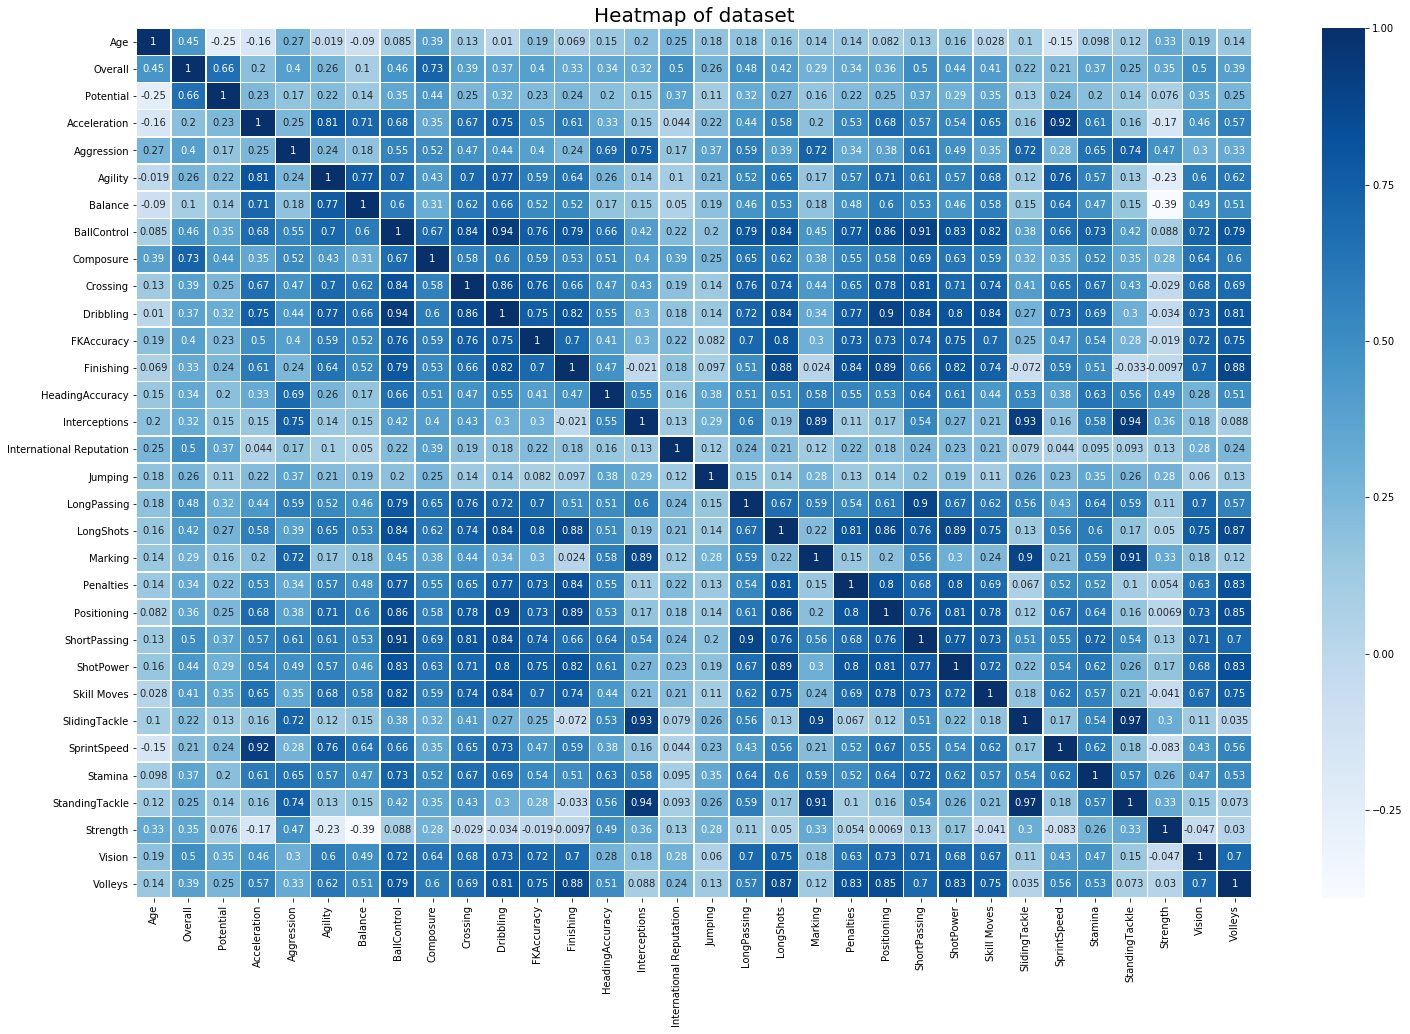

In [7]:
# Correlation heatmap

plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20);

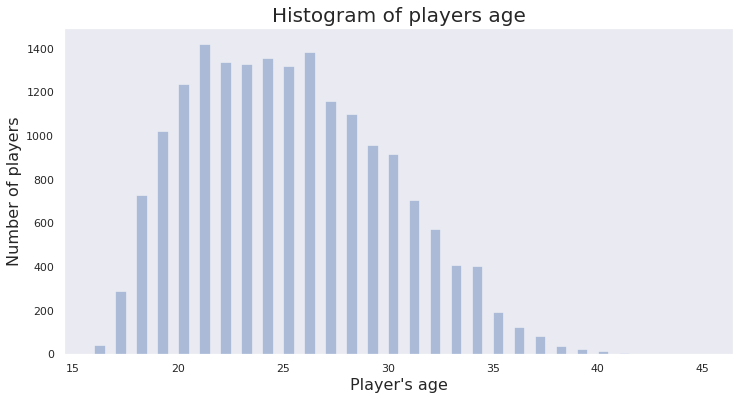

In [8]:
# Histogram: number of players's age

sns.set(style ="dark") # style dark means there is no any square box on histogram plot
plt.figure(figsize=(12,6))
ax = sns.distplot(df.Age, bins = 58, kde = False) #  bins => gap between two bar graph
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

In [9]:
# The ten eldest players

eldest = df.sort_values('Age', ascending = False)[['Name','Club', 'Nationality', 'Age']].head(10)
eldest.set_index('Name', inplace=True)
print(eldest)

                                       Club        Nationality  Age
Name                                                               
O. Pérez                            Pachuca             Mexico   45
K. Pilkington              Cambridge United            England   44
T. Warner                Accrington Stanley  Trinidad & Tobago   44
S. Narazaki                  Nagoya Grampus              Japan   42
C. Muñoz       CD Universidad de Concepción          Argentina   41
J. Villar                               NaN           Paraguay   41
H. Sulaimani                      Ohod Club       Saudi Arabia   41
M. Tyler                Peterborough United            England   41
B. Nivet                       ESTAC Troyes             France   41
F. Kippe                      Lillestrøm SK             Norway   40


In [10]:
# The ten youngest players

eldest = df.sort_values('Age', ascending = True)[['Name','Club', 'Nationality', 'Age']].head(10)
eldest.set_index('Name', inplace=True)
print(eldest)

                           Club          Nationality  Age
Name                                                     
G. Nugent       Tranmere Rovers              England   16
J. Olstad       Sarpsborg 08 FF               Norway   16
H. Massengo           AS Monaco               France   16
J. Italiano         Perth Glory            Australia   16
N. Ayéva              Örebro SK               Sweden   16
K. Broda           Wisła Kraków               Poland   16
L. D'Arrigo     Adelaide United            Australia   16
Y. Verschaeren   RSC Anderlecht              Belgium   16
B. Nygren          IFK Göteborg               Sweden   16
B. O'Gorman      Bray Wanderers  Republic of Ireland   16


In [11]:
# The longest membership in the club

now = datetime.datetime.now()
df['Join_year'] = df.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
df['Years_of_member'] = (df.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int').dropna()
membership = df[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).dropna().head(10)
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,28.0
M. Ogasawara,Kashima Antlers,21.0
H. Sogahata,Kashima Antlers,21.0
M. Al Shalhoub,Al Hilal,21.0
S. Narazaki,Nagoya Grampus,20.0
M. Wölfli,BSC Young Boys,19.0
K. Kitamoto,Vissel Kobe,19.0
C. Källqvist,BK Häcken,18.0
Y. Endo,Gamba Osaka,18.0


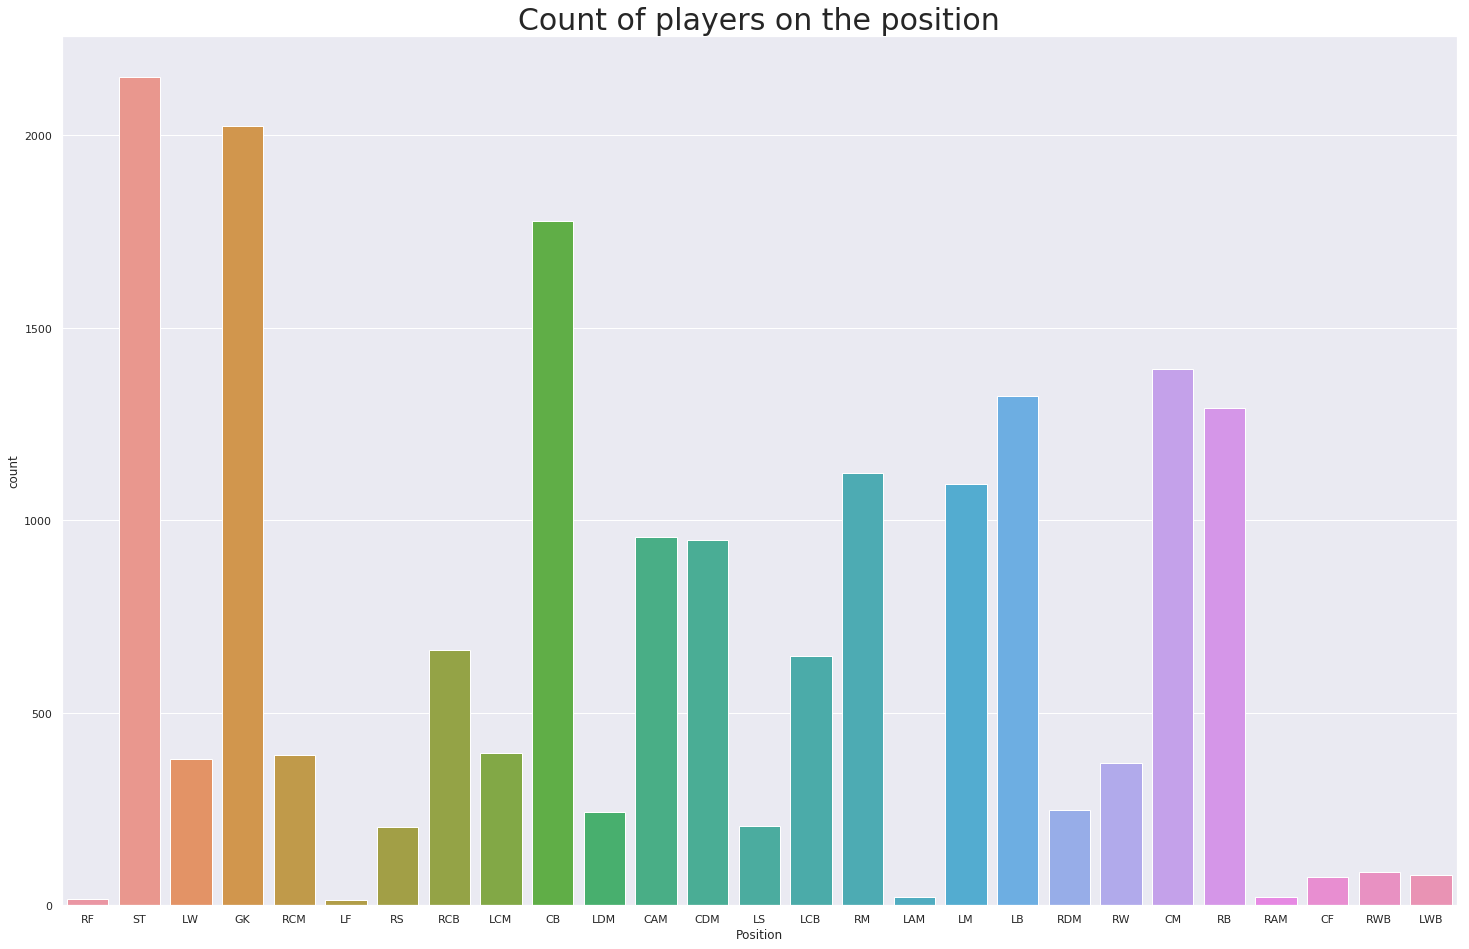

In [12]:
# Number of players in particular position

sns.set(style="darkgrid")
ax = sns.countplot(x = 'Position' ,data = df) 
# countplot is use for showing the counts of observations in each categorical bin using bars.
ax.set_title(label='Count of players on the position', fontsize=30);

In [13]:
# The best player per position

# idxmax() returns index where you get maximum value but max() returns particular maximum value not index

top_players=df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name', 'Position','Club']]
top_players.set_index('Name', inplace=True)
top_players

,Position,Club
Name,,
A. Griezmann,CAM,Atlético Madrid
D. Godín,CB,Atlético Madrid
Sergio Busquets,CDM,FC Barcelona
Luis Alberto,CF,Lazio
Thiago,CM,FC Bayern München
De Gea,GK,Manchester United
J. Rodríguez,LAM,FC Bayern München
Marcelo,LB,Real Madrid
G. Chiellini,LCB,Juventus


In [14]:
# Top three features per position

player_features = [
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
    ]

# It group the data according to Position and find mean of particular grouped columns having player_features

for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

In [15]:
# Top 10 left-footed players

left_foot=df[df['Preferred Foot'] == 'Left'][['Name','Overall','Club','Position','Nationality']].head(10)
left_foot.set_index('Name',inplace=True)
left_foot

,Overall,Club,Position,Nationality
Name,,,,
L. Messi,94,FC Barcelona,RF,Argentina
David Silva,90,Manchester City,LCM,Spain
P. Dybala,89,Juventus,LF,Argentina
A. Griezmann,89,Atlético Madrid,CAM,France
T. Courtois,89,Real Madrid,GK,Belgium
G. Chiellini,89,Juventus,LCB,Italy
M. Salah,88,Liverpool,RM,Egypt
J. Rodríguez,88,FC Bayern München,LAM,Colombia
Marcelo,88,Real Madrid,LB,Brazil


In [16]:
# Top 10 right-footed players

right_foot=df[df['Preferred Foot'] == 'Right'][['Name','Overall','Club','Position','Nationality']].head(10)
right_foot.set_index('Name',inplace=True)
right_foot

,Overall,Club,Position,Nationality
Name,,,,
Cristiano Ronaldo,94,Juventus,ST,Portugal
Neymar Jr,92,Paris Saint-Germain,LW,Brazil
De Gea,91,Manchester United,GK,Spain
K. De Bruyne,91,Manchester City,RCM,Belgium
E. Hazard,91,Chelsea,LF,Belgium
L. Modrić,91,Real Madrid,RCM,Croatia
L. Suárez,91,FC Barcelona,RS,Uruguay
Sergio Ramos,91,Real Madrid,RCB,Spain
J. Oblak,90,Atlético Madrid,GK,Slovenia


In [17]:
# The clubs, where have players mainly from one country

clubs_coherency = pd.Series()
for club, players in df.groupby(['Club'])['Nationality'].count().items():
    coherency = df[df['Club'] == club].groupby(['Nationality'])['Club'].count().max() / players * 100
    clubs_coherency[club] = coherency

clubs_coherency.sort_values(ascending = False).head(20)

CA Osasuna              100.0
Ceará Sporting Club     100.0
Botafogo                100.0
Vitória                 100.0
Internacional           100.0
Sangju Sangmu FC        100.0
Santos                  100.0
Guadalajara             100.0
Grêmio                  100.0
Atlético Paranaense     100.0
Sport Club do Recife    100.0
Fluminense              100.0
Ranheim Fotball         100.0
Chapecoense             100.0
Cittadella              100.0
Cork City               100.0
Bahia                   100.0
Cruzeiro                100.0
Paraná                  100.0
Atlético Mineiro        100.0
dtype: float64

In [18]:
# The clubs with largest number of different countries players
# nunique => count distinct observations over requested axis

df.groupby(['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Lazio                     18
Empoli                    18
Napoli                    18
AS Monaco                 18
West Ham United           18
Eintracht Frankfurt       18
Bologna                   17
Name: Nationality, dtype: int64

In [19]:
# The value has some non numeric mark(K or M) so extract rigth value
# Calculate value of club with summation of every player's value from particular club

def value_to_int(df_value):
    try:
        value = float(df_value[1:-1]) # This return 110.5 from €110.5M
        suffix = df_value[-1:] # This return M or K
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value_float'] = df['Value'].apply(value_to_int)

# Top five the most expensive clubs
df.groupby(['Club'])['Value_float'].sum().sort_values(ascending = False).head(10)

Club
Real Madrid            874425000.0
FC Barcelona           852600000.0
Manchester City        786555000.0
Juventus               704475000.0
FC Bayern München      679025000.0
Atlético Madrid        644525000.0
Paris Saint-Germain    625325000.0
Tottenham Hotspur      618450000.0
Chelsea                606815000.0
Manchester United      588850000.0
Name: Value_float, dtype: float64

In [20]:
# Top ten the less expensive clubs

df.groupby(['Club'])['Value_float'].sum().sort_values().head(10)

Club
Bray Wanderers            1930000.0
Limerick FC               2040000.0
Derry City                2795000.0
Bohemian FC               3195000.0
Sligo Rovers              3295000.0
St. Patrick's Athletic    3995000.0
Macclesfield Town         4645000.0
Morecambe                 4710000.0
Cambridge United          4845000.0
Carlisle United           5385000.0
Name: Value_float, dtype: float64

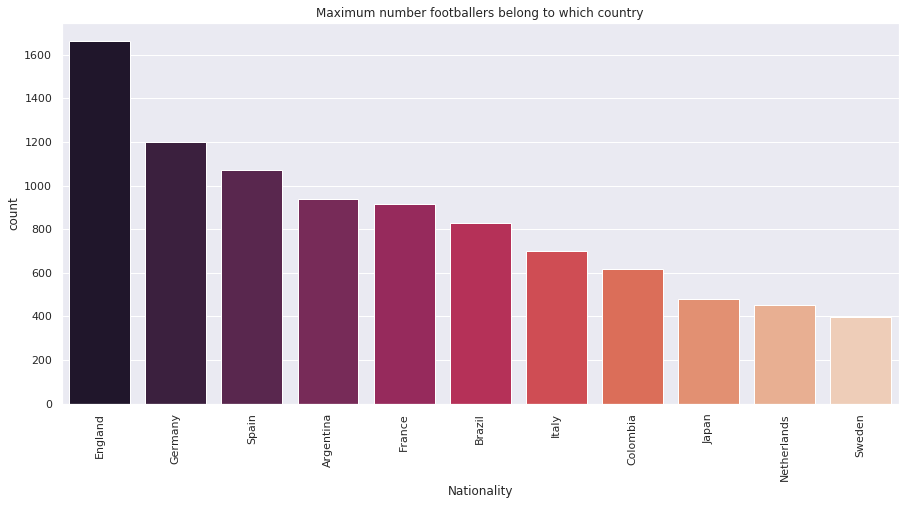

In [21]:
# Maximum number of player from particular country
# Counter return as dictionary that is key:'Country_Name' values:'Total_Number_Of_Players'
# most_common return list in descending order with respect to Total_Number_Of_Players
# most_common()[:11] this return top 10 

plt.figure(1 , figsize = (15 , 7))
countries = []
c = counter(df['Nationality']).most_common()[:11]
for n in range(11):
    countries.append(c[n][0])

# value_counts() return a series containing counts of unique values

sns.countplot(x  = 'Nationality' ,
              data = df[df['Nationality'].isin(countries)] ,
              order  = df[df['Nationality'].isin(countries)]['Nationality'].value_counts().index , 
             palette = 'rocket') 
plt.xticks(rotation = 90)
plt.title('Maximum number footballers belong to which country' )
plt.show()

In [22]:
# Player with great shot power

gshot=df.sort_values(by = 'ShotPower' , ascending = False)[['Name' , 'Club' , 'Nationality' ,'ShotPower' ]].head(10)
gshot.set_index('Name',inplace=True)
gshot

,Club,Nationality,ShotPower
Name,,,
Cristiano Ronaldo,Juventus,Portugal,95.0
Hulk,Shanghai SIPG FC,Brazil,94.0
F. Guarín,Shanghai Greenland Shenhua FC,Colombia,93.0
L. Podolski,Vissel Kobe,Germany,92.0
G. Bale,Real Madrid,Wales,92.0
Naldo,FC Schalke 04,Brazil,92.0
K. De Bruyne,Manchester City,Belgium,91.0
A. Kolarov,Roma,Serbia,91.0
P. Pogba,Manchester United,France,90.0


In [23]:
# Player with best long pass

blpass=df.sort_values(by = 'LongPassing' , ascending = False)[['Name' , 'Club' , 'Nationality' , 'LongPassing']].head(10)
blpass.set_index('Name',inplace=True)
blpass

,Club,Nationality,LongPassing
Name,,,
T. Kroos,Real Madrid,Germany,93.0
K. De Bruyne,Manchester City,Belgium,91.0
P. Pogba,Manchester United,France,90.0
I. Rakitić,FC Barcelona,Croatia,90.0
Cesc Fàbregas,Chelsea,Spain,89.0
H. Ziyech,Ajax,Morocco,89.0
M. Verratti,Paris Saint-Germain,Italy,89.0
Koke,Atlético Madrid,Spain,89.0
L. Modrić,Real Madrid,Croatia,88.0


In [24]:
# Player with great Vision

gvision=df.sort_values(by = 'Vision' , ascending = False)[['Name' , 'Club' , 'Nationality' ,'Vision' ]].head(10)
gvision.set_index('Name',inplace=True)
gvision

,Club,Nationality,Vision
Name,,,
L. Messi,FC Barcelona,Argentina,94.0
K. De Bruyne,Manchester City,Belgium,94.0
Iniesta,Vissel Kobe,Spain,93.0
David Silva,Manchester City,Spain,92.0
L. Modrić,Real Madrid,Croatia,92.0
M. Özil,Arsenal,Germany,91.0
Cesc Fàbregas,Chelsea,Spain,91.0
C. Eriksen,Tottenham Hotspur,Denmark,91.0
Coutinho,FC Barcelona,Brazil,90.0


In [25]:
# Quality should have in players having particular position

df_postion  = pd.DataFrame()
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_postion[position_name] = tuple(top_features)
df_postion

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Balance,Jumping,Aggression,Agility,Balance,GKReflexes,Agility,Acceleration,Jumping,Balance,...,Acceleration,Jumping,Agility,Aggression,Agility,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration
1,Agility,Aggression,Jumping,Balance,Agility,GKDiving,Balance,Balance,Aggression,Agility,...,Balance,Aggression,Balance,Jumping,Acceleration,Agility,Agility,Agility,Agility,Jumping
2,Acceleration,HeadingAccuracy,Balance,Acceleration,Acceleration,GKPositioning,Acceleration,Agility,HeadingAccuracy,BallControl,...,Jumping,HeadingAccuracy,BallControl,BallControl,Balance,Balance,Jumping,Balance,Balance,Finishing
3,BallControl,Marking,BallControl,Dribbling,BallControl,GKHandling,Dribbling,Jumping,Marking,LongPassing,...,Agility,Marking,LongPassing,LongPassing,BallControl,Dribbling,Finishing,Dribbling,Jumping,Agility
4,Dribbling,Interceptions,Interceptions,BallControl,LongPassing,GKKicking,BallControl,Aggression,Interceptions,Acceleration,...,Aggression,Interceptions,Aggression,Balance,Dribbling,BallControl,BallControl,BallControl,Aggression,Balance


In [26]:
# Display name of player having age less than 25 years , Overall rating is more than 75 and from country Brazil

filtering_data = df.Nationality == "Brazil"
filtering_data2 = df.Age < 25
filtering_data3 = df.Overall > 75
best_brazil=(df[filtering_data & filtering_data2 & filtering_data3].sort_values(by = 'Overall' , ascending = False))[['Name','Age','Club','Nationality']]
best_brazil.set_index('Name',inplace=True)
best_brazil

,Age,Club,Nationality
Name,,,
Ederson,24,Manchester City,Brazil
Marquinhos,24,Paris Saint-Germain,Brazil
Fabinho,24,Liverpool,Brazil
Gabriel Jesus,21,Manchester City,Brazil
Anderson Talisca,24,Guangzhou Evergrande Taobao FC,Brazil
Arthur,21,FC Barcelona,Brazil
Malcom,21,FC Barcelona,Brazil
David Neres,21,Ajax,Brazil
Raphinha,21,Sporting CP,Brazil
